This project analyzes the Women's Clothing E-Commerce Reviews dataset to predict
customer sentiment using various machine learning techniques. We'll explore the
relationship between ratings, demographics, and text features to build robust
sentiment classification models.

Key objectives:
1. Understand customer sentiment patterns in clothing reviews
2. Build and compare multiple classification models
3. Provide actionable business insights for e-commerce optimization

**IMPORTING MODULES AND READING THE DATASET**

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Text processing
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluation metrics
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_curve, auc, precision_recall_curve,
                           accuracy_score, precision_score, recall_score, f1_score)

# Plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


All libraries imported successfully!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**LOAD AND EXPLORE DATASET**

In [4]:
data = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
df = data.copy()

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn descriptions:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset Shape: (23486, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None

First 5 rows:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   3

**MISSING DATA ANALYSIS**

In [7]:
def analyze_missing_data():
    """Comprehensive missing data analysis"""

    # Calculate missing percentages
    missing_data = pd.DataFrame({
        'Missing_Count': data.isnull().sum(),  # Use original data before cleaning
        'Missing_Percentage': (data.isnull().sum() / len(data)) * 100
    })
    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

    if len(missing_data) > 0:
        print("Missing Data Analysis:")
        print(missing_data)

        # Visualize missing data
        plt.figure(figsize=(10, 6))
        missing_data['Missing_Percentage'].plot(kind='bar')
        plt.title('Missing Data Percentage by Column')
        plt.ylabel('Missing Percentage (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Analyze patterns in missing data
        print("\nMissing Data Insights:")
        if 'Title' in missing_data.index:
            print(f"- Title missing in {missing_data.loc['Title', 'Missing_Percentage']:.1f}% of reviews")
        if 'Review Text' in missing_data.index:
            print(f"- Review Text missing in {missing_data.loc['Review Text', 'Missing_Percentage']:.1f}% of reviews")
        print("- This suggests some customers provide ratings without detailed reviews")
        print("- Title field appears to be optional for many customers")
    else:
        print("No missing data found!")

=== MISSING DATA ANALYSIS (Before Cleaning) ===
Missing Data Analysis:
                 Missing_Count  Missing_Percentage
Title                     3810           16.222430
Review Text                845            3.597888
Division Name               14            0.059610
Department Name             14            0.059610
Class Name                  14            0.059610


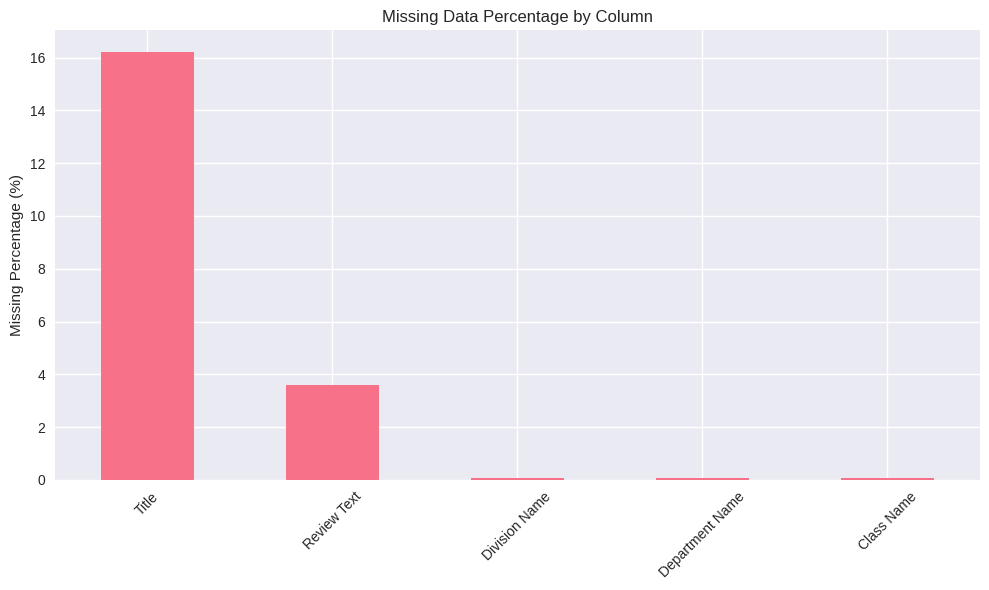


Missing Data Insights:
- Title missing in 16.2% of reviews
- Review Text missing in 3.6% of reviews
- This suggests some customers provide ratings without detailed reviews
- Title field appears to be optional for many customers


In [8]:
# Run missing data analysis on original data before cleaning
print("=== MISSING DATA ANALYSIS (Before Cleaning) ===")
analyze_missing_data()

**DATA PREPROCESSING AND CLEANING**

Original columns: ['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']
=== DATA QUALITY INSIGHTS ===

Customer Review Patterns:
Reviews with titles: 19,676 (83.8%)
Reviews without titles: 3,810 (16.2%)

Rating Patterns:
Average rating with title: 4.18
Average rating without title: 4.26
Statistical difference (p-value): 0.0001


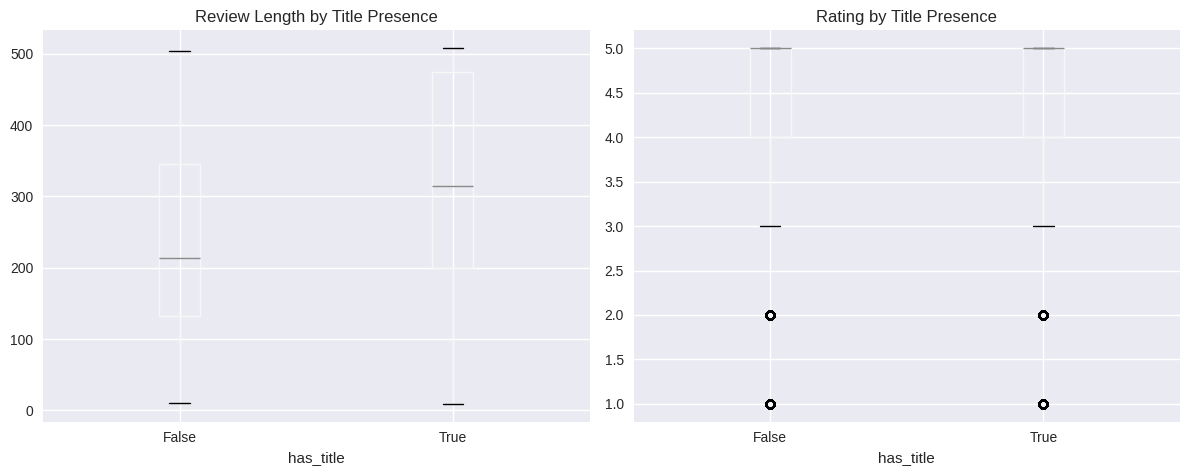

Initial dataset size: 23486
After removing missing review text: 22641
Final dataset size after cleaning: 22641

Missing values after cleaning:
clothing_id                0
age                        0
title                      0
review_text                0
rating                     0
recommended                0
positive_feedback_count    0
division_name              0
department_name            0
class_name                 0
review_length_original     0
has_title                  0
dtype: int64

Sentiment distribution:
sentiment
Positive    17448
Neutral      2823
Negative     2370
Name: count, dtype: int64


In [9]:
# The columns are already properly named, let's check and clean them if needed
print("Original columns:", df.columns.tolist())

# Handle the unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Rename columns for consistency (matching your dataset structure)
column_mapping = {
    'Clothing ID': 'clothing_id',
    'Age': 'age',
    'Title': 'title',
    'Review Text': 'review_text',
    'Rating': 'rating',
    'Recommended IND': 'recommended',
    'Positive Feedback Count': 'positive_feedback_count',
    'Division Name': 'division_name',
    'Department Name': 'department_name',
    'Class Name': 'class_name'
}

df = df.rename(columns=column_mapping)
# Data quality insights based on missing patterns
def analyze_data_quality():
    """Analyze data quality and customer behavior patterns"""

    print("=== DATA QUALITY INSIGHTS ===")

    # Analyze relationship between missing titles and other features
    has_title = df['title'].notna() & (df['title'] != '')

    print(f"\nCustomer Review Patterns:")
    print(f"Reviews with titles: {has_title.sum():,} ({has_title.mean()*100:.1f}%)")
    print(f"Reviews without titles: {(~has_title).sum():,} ({(~has_title).mean()*100:.1f}%)")

    # Compare ratings between reviews with/without titles
    if has_title.sum() > 0 and (~has_title).sum() > 0:
        avg_rating_with_title = df[has_title]['rating'].mean()
        avg_rating_without_title = df[~has_title]['rating'].mean()

        print(f"\nRating Patterns:")
        print(f"Average rating with title: {avg_rating_with_title:.2f}")
        print(f"Average rating without title: {avg_rating_without_title:.2f}")

        # Statistical significance test
        from scipy import stats
        stat, p_value = stats.ttest_ind(
            df[has_title]['rating'].dropna(),
            df[~has_title]['rating'].dropna()
        )
        print(f"Statistical difference (p-value): {p_value:.4f}")

    # Analyze review length patterns
    df['review_length_original'] = df['review_text'].str.len()
    df['has_title'] = has_title

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    df.boxplot(column='review_length_original', by='has_title', ax=plt.gca())
    plt.title('Review Length by Title Presence')
    plt.suptitle('')  # Remove automatic title

    plt.subplot(1, 2, 2)
    df.boxplot(column='rating', by='has_title', ax=plt.gca())
    plt.title('Rating by Title Presence')
    plt.suptitle('')  # Remove automatic title

    plt.tight_layout()
    plt.show()

# Run after data loading but before cleaning
analyze_data_quality()

# Handle missing values based on actual data
print(f"Initial dataset size: {len(df)}")

# Remove rows without review text (most critical for our analysis)
df = df.dropna(subset=['review_text'])
print(f"After removing missing review text: {len(df)}")

# Fill missing categorical values
df['title'] = df['title'].fillna('')  # Empty string for missing titles
df['division_name'] = df['division_name'].fillna('Unknown')
df['department_name'] = df['department_name'].fillna('Unknown')
df['class_name'] = df['class_name'].fillna('Unknown')

print(f"Final dataset size after cleaning: {len(df)}")
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Create sentiment labels based on ratings
def create_sentiment_label(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(create_sentiment_label)

# Create binary sentiment for some models (Positive vs Non-Positive)
df['binary_sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

**TEXT PREPROCESSING FUNCTIONS**

In [12]:
def clean_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

def advanced_text_preprocessing(text):
    """Advanced text preprocessing with lemmatization"""
    if pd.isna(text):
        return ""

    # Clean text
    text = clean_text(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens
                       if token not in stop_words and len(token) > 2]

    return ' '.join(processed_tokens)
# Apply text preprocessing
df['clean_review'] = df['review_text'].apply(clean_text)
df['processed_review'] = df['review_text'].apply(advanced_text_preprocessing)

print("Text preprocessing completed!")

Text preprocessing completed!


**ADDING WORD COUNTS AND FEATURE ENGINEERING**

In [13]:

# Add word counts
df['review_length'] = df['review_text'].str.len()
df['word_count'] = df['review_text'].str.split().str.len()
df['sentence_count'] = df['review_text'].str.count(r'[.!?]+')

# Add sentiment scores using TextBlob
df['polarity'] = df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Count specific sentiment words
positive_words = ['love', 'great', 'excellent', 'perfect', 'amazing', 'beautiful', 'comfortable']
negative_words = ['hate', 'terrible', 'awful', 'horrible', 'uncomfortable', 'disappointed']

for word in positive_words:
    df[f'{word}_count'] = df['clean_review'].str.count(word)

for word in negative_words:
    df[f'{word}_count'] = df['clean_review'].str.count(word)

# Calculate positive and negative word ratios
df['positive_word_ratio'] = df[[f'{word}_count' for word in positive_words]].sum(axis=1) / df['word_count']
df['negative_word_ratio'] = df[[f'{word}_count' for word in negative_words]].sum(axis=1) / df['word_count']

print("Feature engineering completed!")

# Display word usage statistics
word_usage = {}
for word in positive_words + negative_words:
    word_usage[word] = df[f'{word}_count'].sum()

print("\nWord usage statistics:")
for word, count in sorted(word_usage.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {count} times")


Feature engineering completed!

Word usage statistics:
love: 11603 times
great: 6135 times
perfect: 5325 times
beautiful: 3404 times
comfortable: 3181 times
disappointed: 586 times
amazing: 544 times
hate: 164 times
excellent: 151 times
uncomfortable: 121 times
awful: 92 times
terrible: 91 times
horrible: 46 times


**WORDCLOUD VISUALIZATIONS**

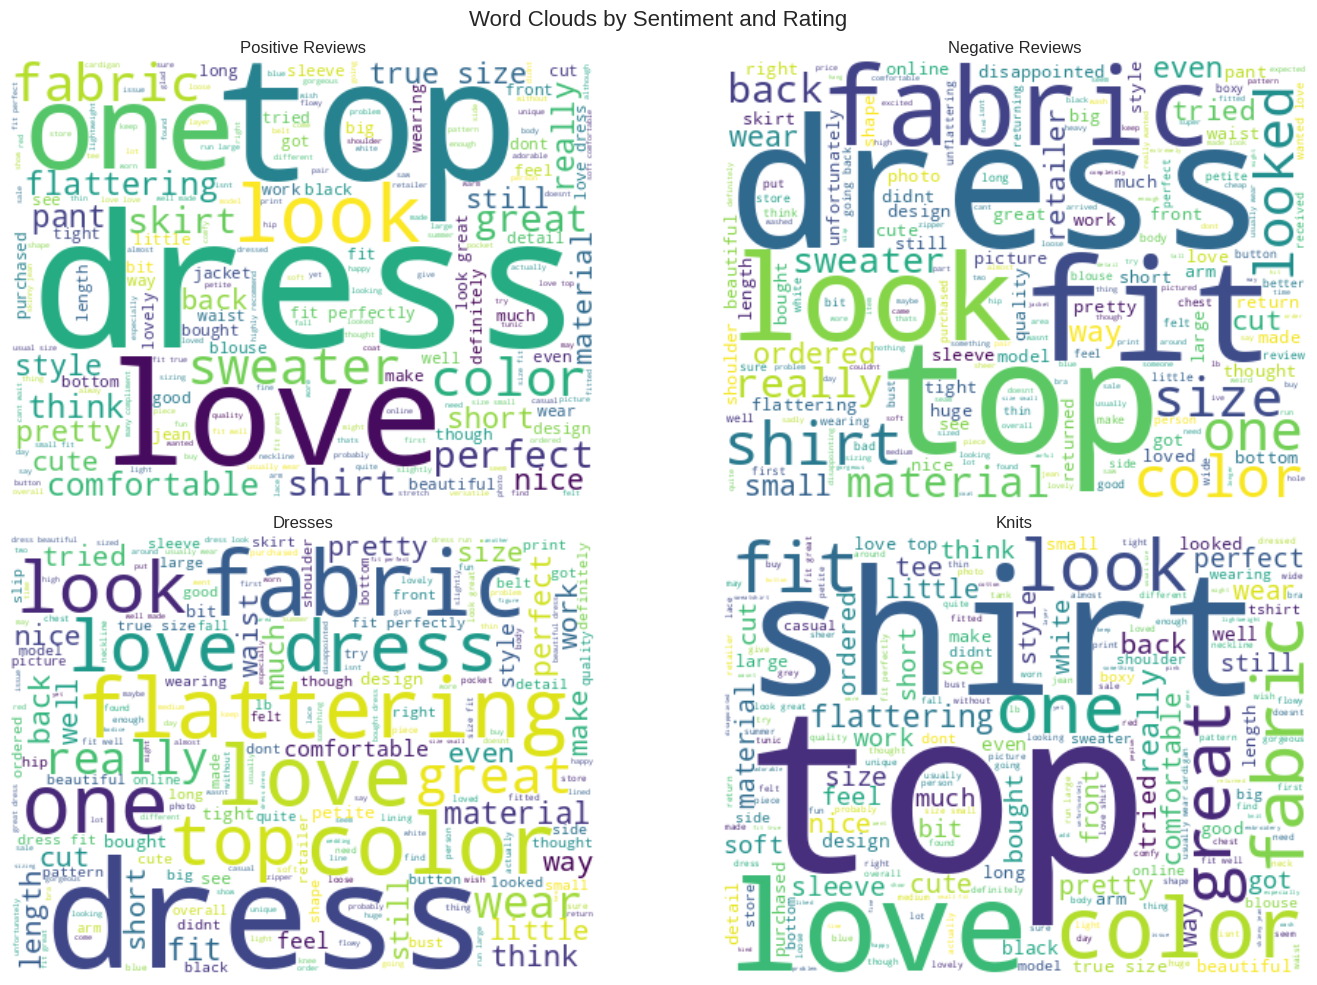

In [14]:
def create_wordcloud_by_sentiment():
    """Create word clouds for different sentiment categories"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Word Clouds by Sentiment and Rating', fontsize=16)

    sentiments = ['Positive', 'Negative']

    for i, sentiment in enumerate(sentiments):
        # Word cloud by sentiment
        text = ' '.join(df[df['sentiment'] == sentiment]['processed_review'])
        wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)

        axes[0, i].imshow(wordcloud, interpolation='bilinear')
        axes[0, i].set_title(f'{sentiment} Reviews')
        axes[0, i].axis('off')

    # Word cloud by class name (top 2 classes)
    top_classes = df['class_name'].value_counts().head(2).index

    for i, class_name in enumerate(top_classes):
        text = ' '.join(df[df['class_name'] == class_name]['processed_review'])
        wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)

        axes[1, i].imshow(wordcloud, interpolation='bilinear')
        axes[1, i].set_title(f'{class_name}')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

create_wordcloud_by_sentiment()

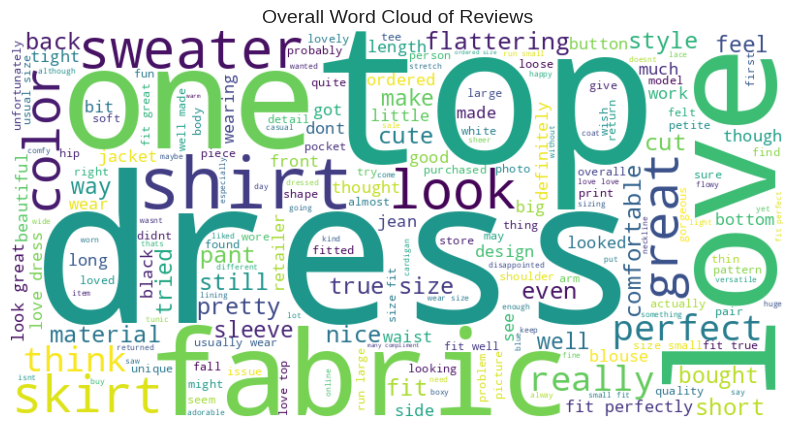

In [15]:
# Overall word cloud
plt.figure(figsize=(10, 6))
all_text = ' '.join(df['processed_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Overall Word Cloud of Reviews', fontsize=14)
plt.axis('off')
plt.show()

**EXPLORATORY DATA ANALYSIS**


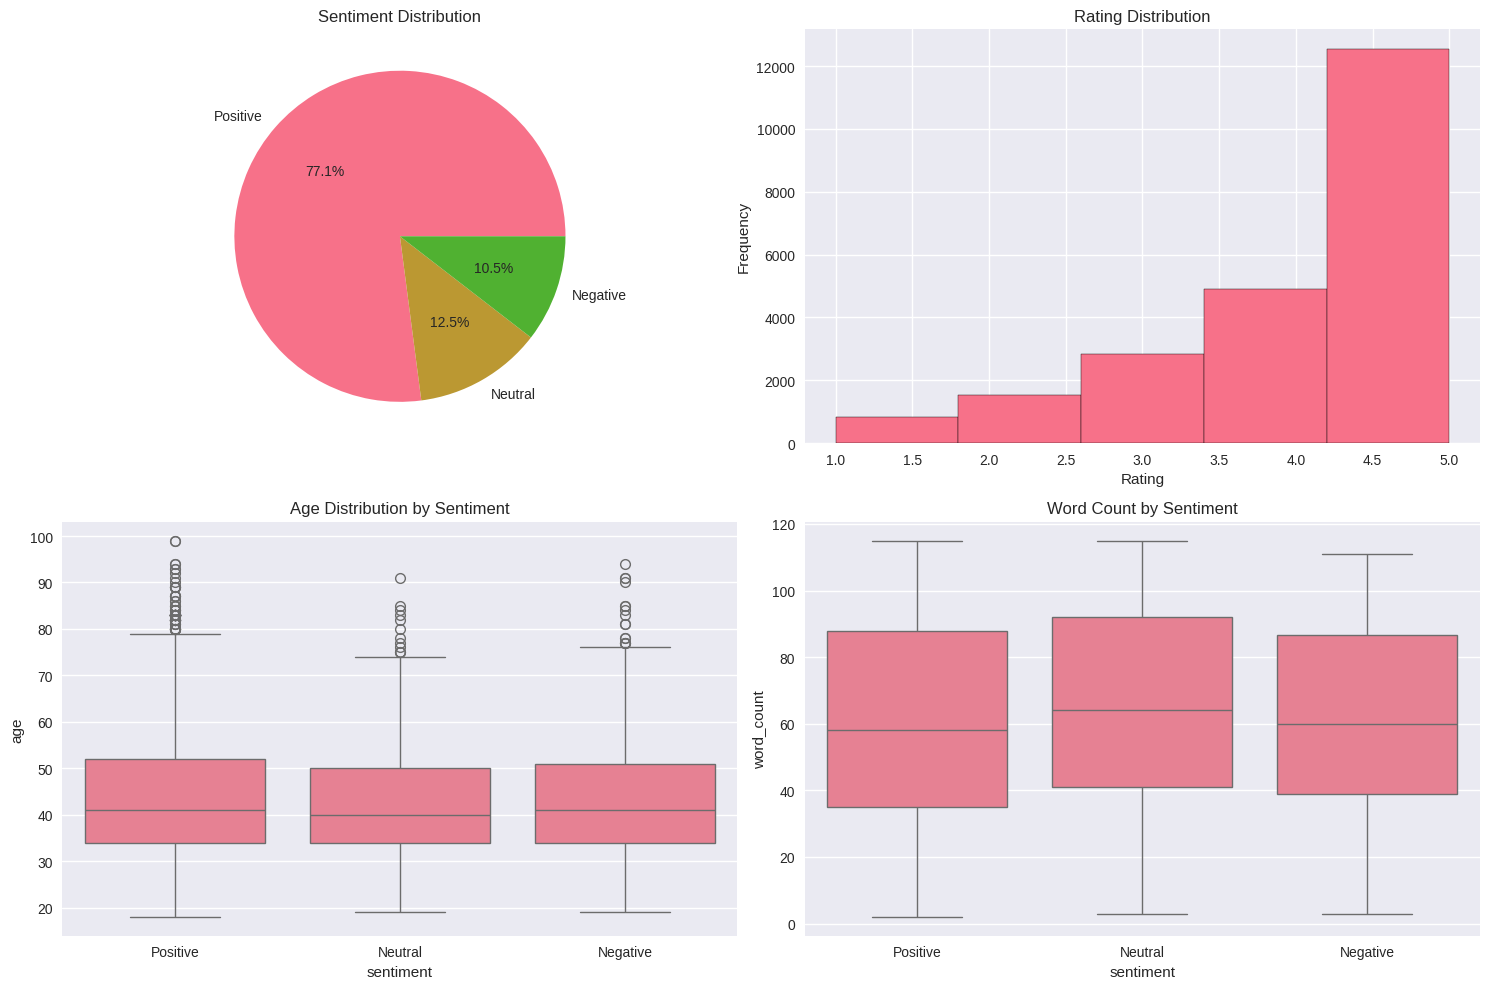

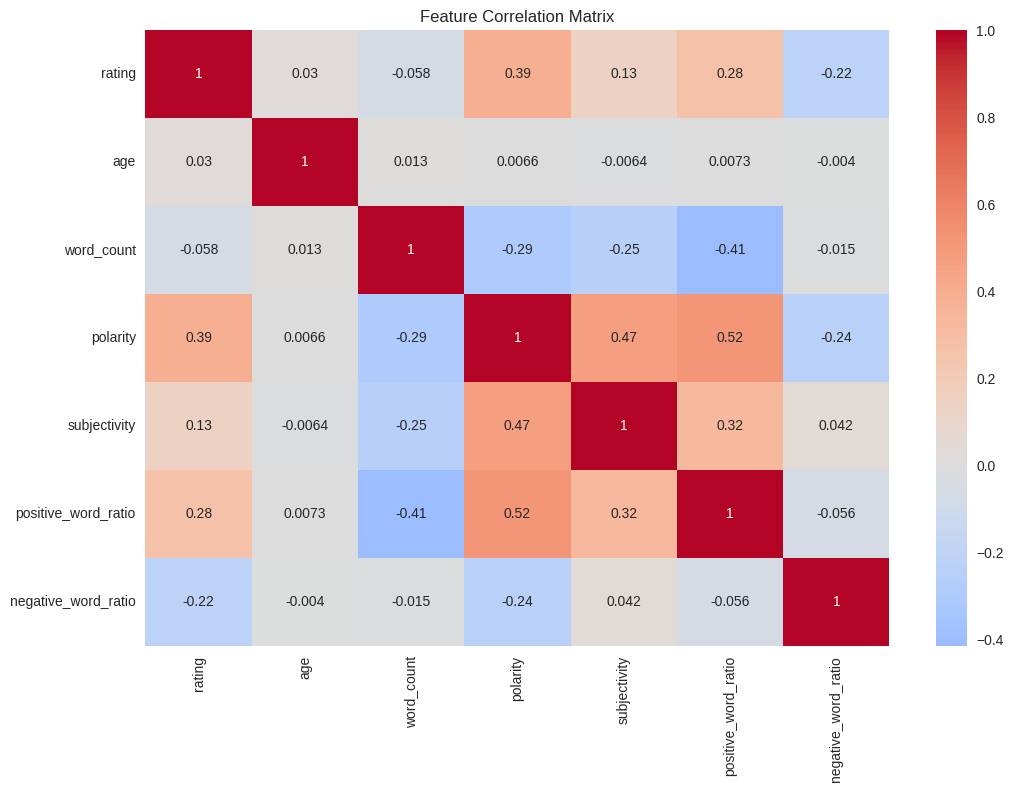

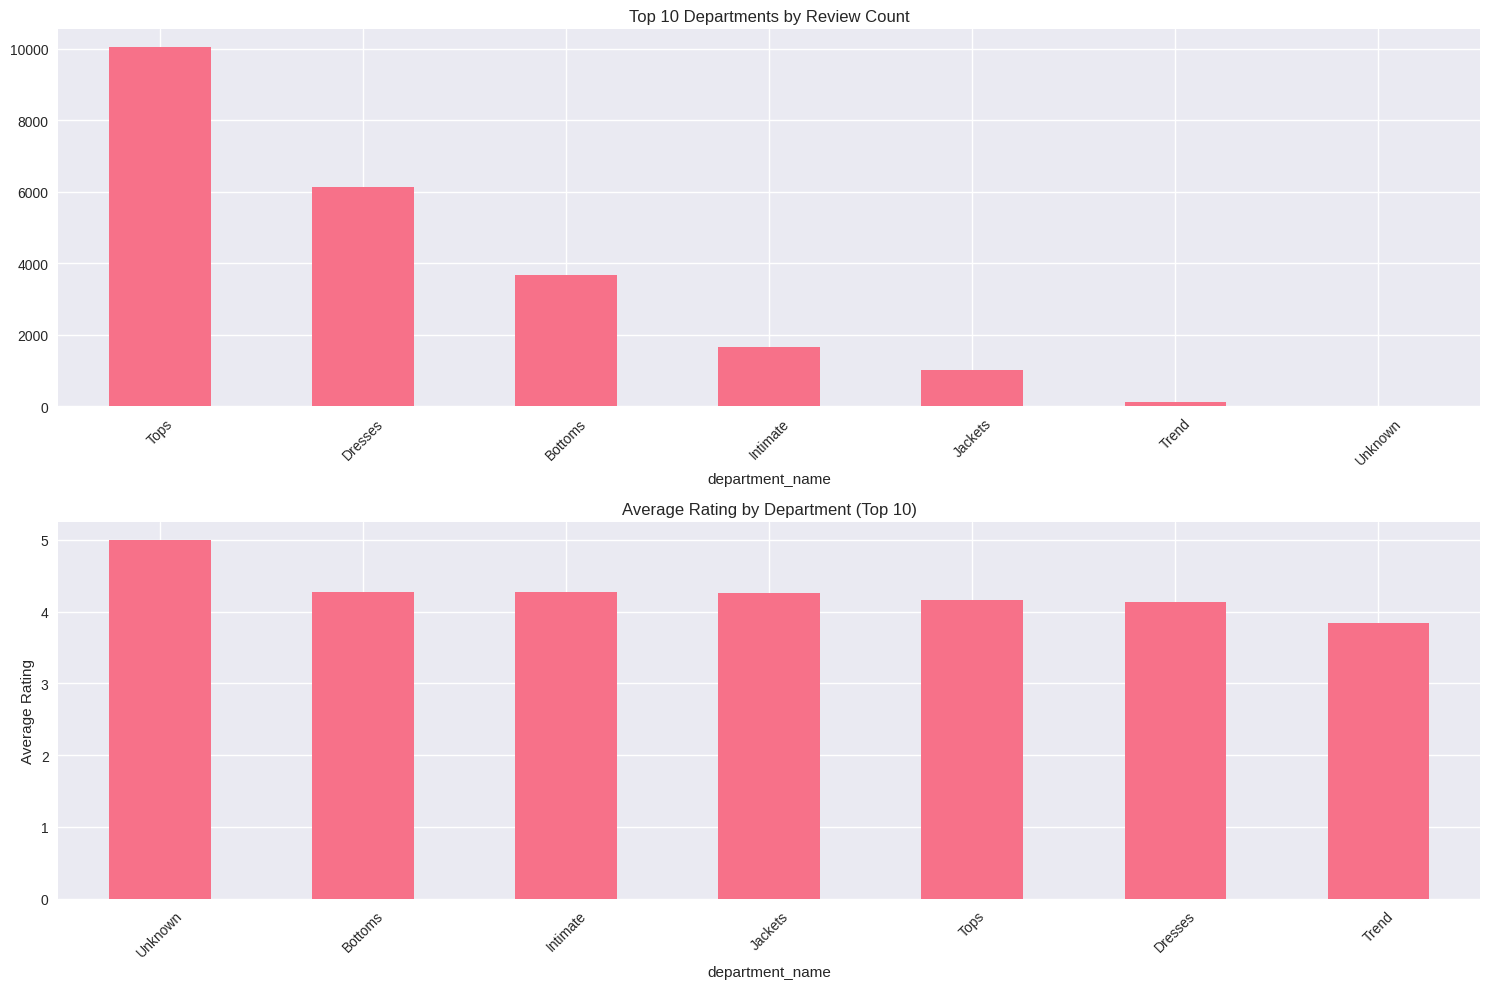

In [16]:
def create_comprehensive_eda():
    """Create comprehensive EDA visualizations"""

    # 1. Sentiment distribution
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Sentiment distribution
    sentiment_counts = df['sentiment'].value_counts()
    axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
    axes[0, 0].set_title('Sentiment Distribution')

    # Rating distribution
    df['rating'].hist(bins=5, ax=axes[0, 1], edgecolor='black')
    axes[0, 1].set_title('Rating Distribution')
    axes[0, 1].set_xlabel('Rating')
    axes[0, 1].set_ylabel('Frequency')

    # Age distribution by sentiment
    sns.boxplot(data=df, x='sentiment', y='age', ax=axes[1, 0])
    axes[1, 0].set_title('Age Distribution by Sentiment')

    # Word count by sentiment
    sns.boxplot(data=df, x='sentiment', y='word_count', ax=axes[1, 1])
    axes[1, 1].set_title('Word Count by Sentiment')

    plt.tight_layout()
    plt.show()

    # 2. Correlation analysis
    plt.figure(figsize=(12, 8))
    correlation_cols = ['rating', 'age', 'word_count', 'polarity', 'subjectivity',
                       'positive_word_ratio', 'negative_word_ratio']
    corr_matrix = df[correlation_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.show()

    # 3. Department and class analysis
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))

    # Top departments by review count
    dept_counts = df['department_name'].value_counts().head(10)
    dept_counts.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Top 10 Departments by Review Count')
    axes[0].tick_params(axis='x', rotation=45)

    # Average rating by department
    dept_ratings = df.groupby('department_name')['rating'].mean().sort_values(ascending=False).head(10)
    dept_ratings.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Average Rating by Department (Top 10)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylabel('Average Rating')

    plt.tight_layout()
    plt.show()

create_comprehensive_eda()

**RELATION BETWEEN RATINGS, CLASS NAMES AND AGE**

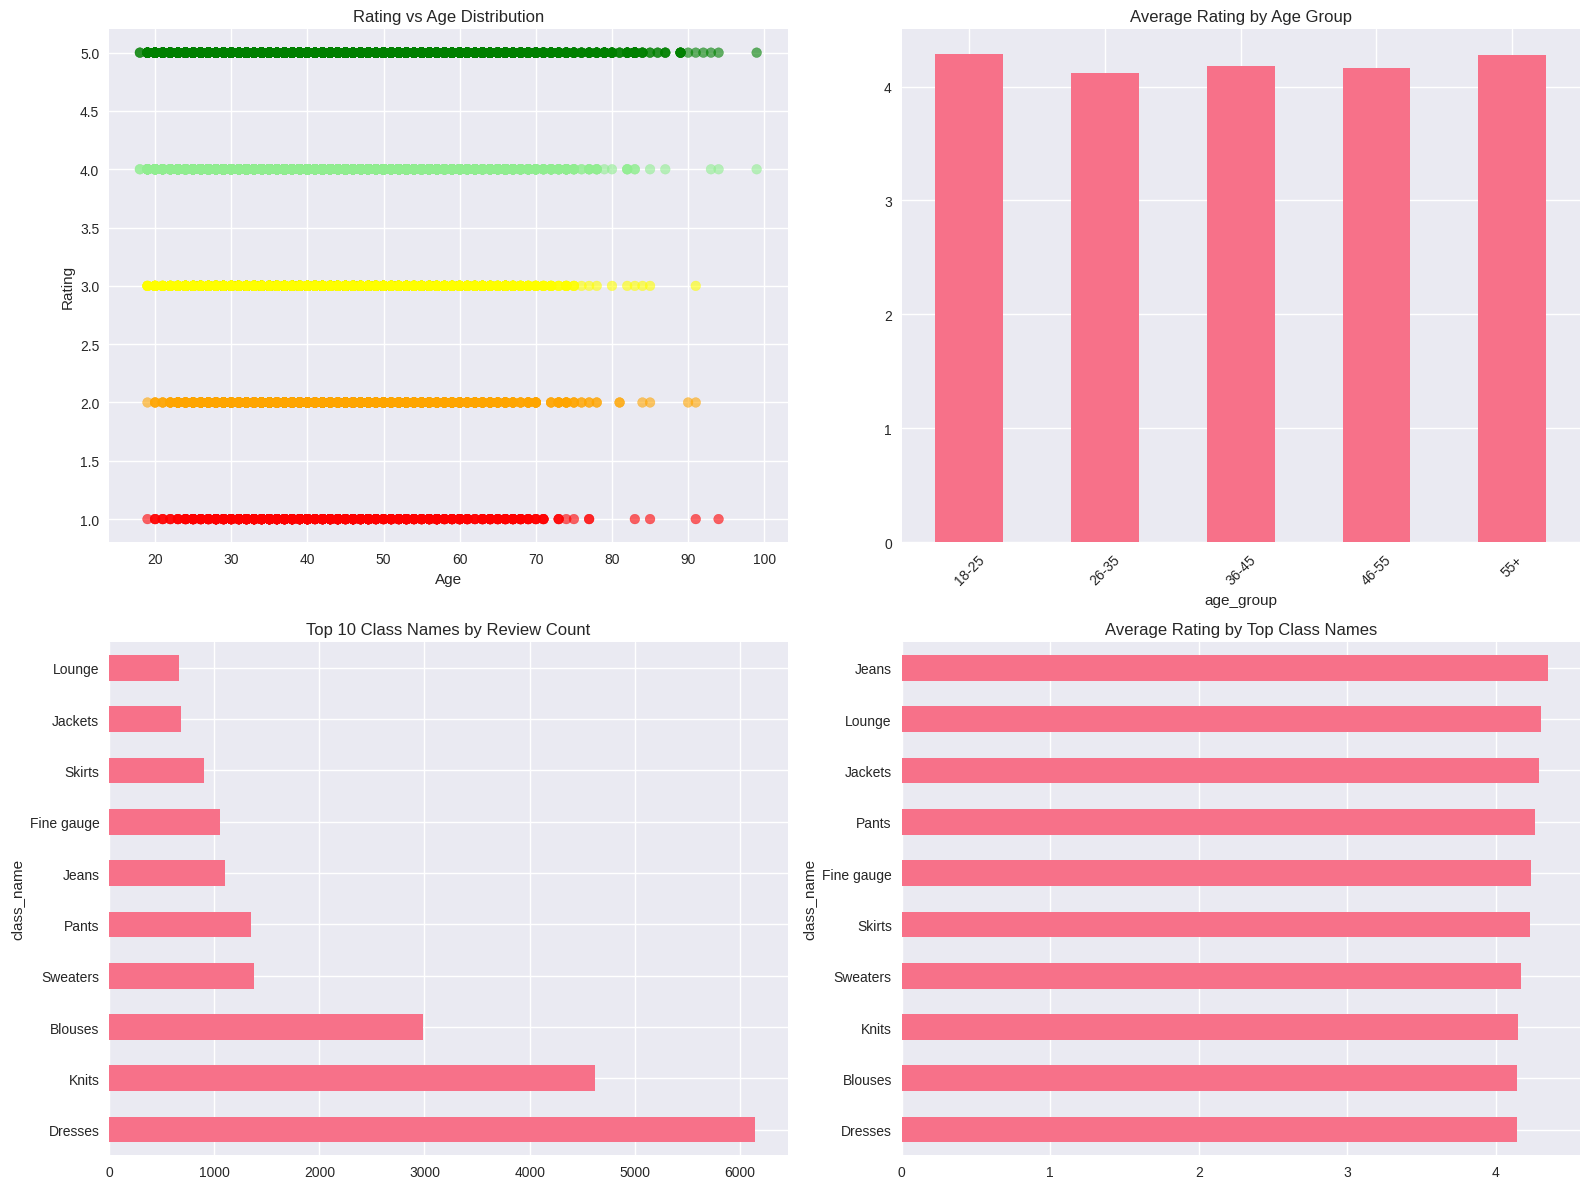

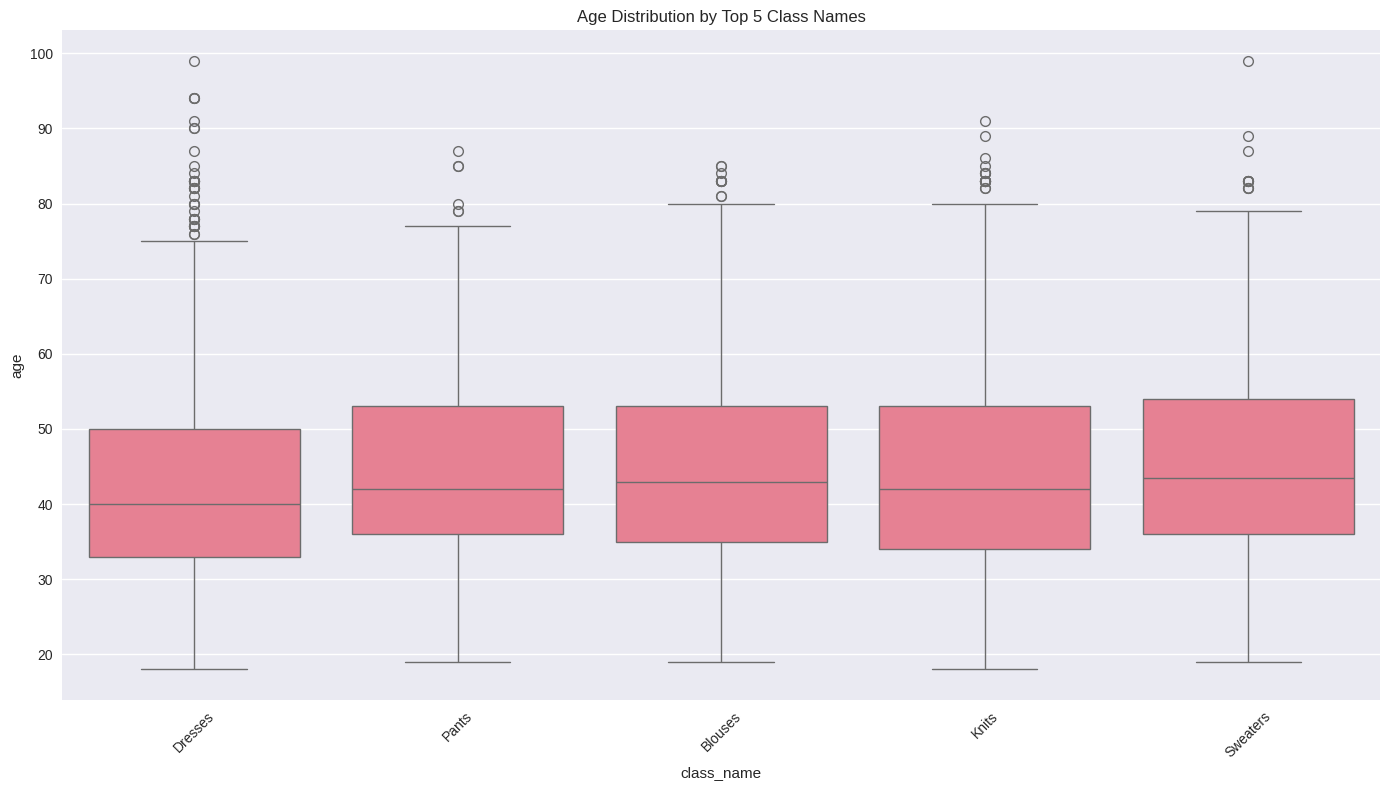

In [17]:
def analyze_rating_relationships():
    """Analyze relationships between ratings, class names, and age"""

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Rating vs Age scatter plot
    scatter_colors = df['rating'].map({1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'green'})
    axes[0, 0].scatter(df['age'], df['rating'], c=scatter_colors, alpha=0.6)
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Rating')
    axes[0, 0].set_title('Rating vs Age Distribution')

    # 2. Average rating by age group
    df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100],
                            labels=['18-25', '26-35', '36-45', '46-55', '55+'])
    age_rating = df.groupby('age_group')['rating'].mean()
    age_rating.plot(kind='bar', ax=axes[0, 1])
    axes[0, 1].set_title('Average Rating by Age Group')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Top classes by review count
    top_classes = df['class_name'].value_counts().head(10)
    top_classes.plot(kind='barh', ax=axes[1, 0])
    axes[1, 0].set_title('Top 10 Class Names by Review Count')

    # 4. Average rating by top classes
    class_ratings = df[df['class_name'].isin(top_classes.index)].groupby('class_name')['rating'].mean().sort_values(ascending=True)
    class_ratings.plot(kind='barh', ax=axes[1, 1])
    axes[1, 1].set_title('Average Rating by Top Class Names')

    plt.tight_layout()
    plt.show()

    # Additional analysis: Age distribution by class
    plt.figure(figsize=(14, 8))
    top_5_classes = df['class_name'].value_counts().head(5).index
    df_top_classes = df[df['class_name'].isin(top_5_classes)]

    sns.boxplot(data=df_top_classes, x='class_name', y='age')
    plt.xticks(rotation=45)
    plt.title('Age Distribution by Top 5 Class Names')
    plt.tight_layout()
    plt.show()

analyze_rating_relationships()


**BUILDING SENTIMENT CLASSIFIERS**

In [18]:
# Prepare data for machine learning
X_text = df['processed_review']
y_binary = df['binary_sentiment']
y_multiclass = df['sentiment']

# Split data
X_train_text, X_test_text, y_train_binary, y_test_binary = train_test_split(
    X_text, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

X_train_text_multi, X_test_text_multi, y_train_multi, y_test_multi = train_test_split(
    X_text, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass
)

# Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

print("Data prepared for machine learning!")
print(f"Training set size: {X_train_tfidf.shape}")
print(f"Test set size: {X_test_tfidf.shape}")


Data prepared for machine learning!
Training set size: (18112, 5000)
Test set size: (4529, 5000)


**MODEL TRAINING AND EVALUATION**

In [19]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Store results
results = {}
predictions = {}
probabilities = {}

print("Training models...")

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_tfidf, y_train_binary)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    y_prob = model.predict_proba(X_test_tfidf)[:, 1] if hasattr(model, 'predict_proba') else None

    # Store results
    predictions[name] = y_pred
    probabilities[name] = y_prob

    # Calculate metrics
    accuracy = accuracy_score(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred)
    recall = recall_score(y_test_binary, y_pred)
    f1 = f1_score(y_test_binary, y_pred)

    # Cross-validation score
    cv_score = cross_val_score(model, X_train_tfidf, y_train_binary, cv=5, scoring='f1').mean()

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV F1-Score': cv_score
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

print("Model training completed!")

Training models...
Training Logistic Regression...
Logistic Regression - Accuracy: 0.8711, F1-Score: 0.9198
Training Naive Bayes...
Naive Bayes - Accuracy: 0.8574, F1-Score: 0.9133
Training SVM...
SVM - Accuracy: 0.8752, F1-Score: 0.9223
Training Neural Network...
Neural Network - Accuracy: 0.8501, F1-Score: 0.9030
Training Random Forest...
Random Forest - Accuracy: 0.8565, F1-Score: 0.9122
Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.8386, F1-Score: 0.9032
Model training completed!


**ADDING RESULTS TO DATAFRAME**

In [20]:
# Create results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\nModel Performance Comparison:")
print(results_df)

# Save results
results_df.to_csv('model_results.csv')



Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score  CV F1-Score
SVM                    0.8752     0.8868  0.9607    0.9223       0.9198
Logistic Regression    0.8711     0.8832  0.9596    0.9198       0.9186
Naive Bayes            0.8574     0.8593  0.9745    0.9133       0.9100
Random Forest          0.8565     0.8626  0.9679    0.9122       0.9082
Gradient Boosting      0.8386     0.8397  0.9771    0.9032       0.9023
Neural Network         0.8501     0.9001  0.9060    0.9030       0.9003


**ROC CURVES AND AUC**

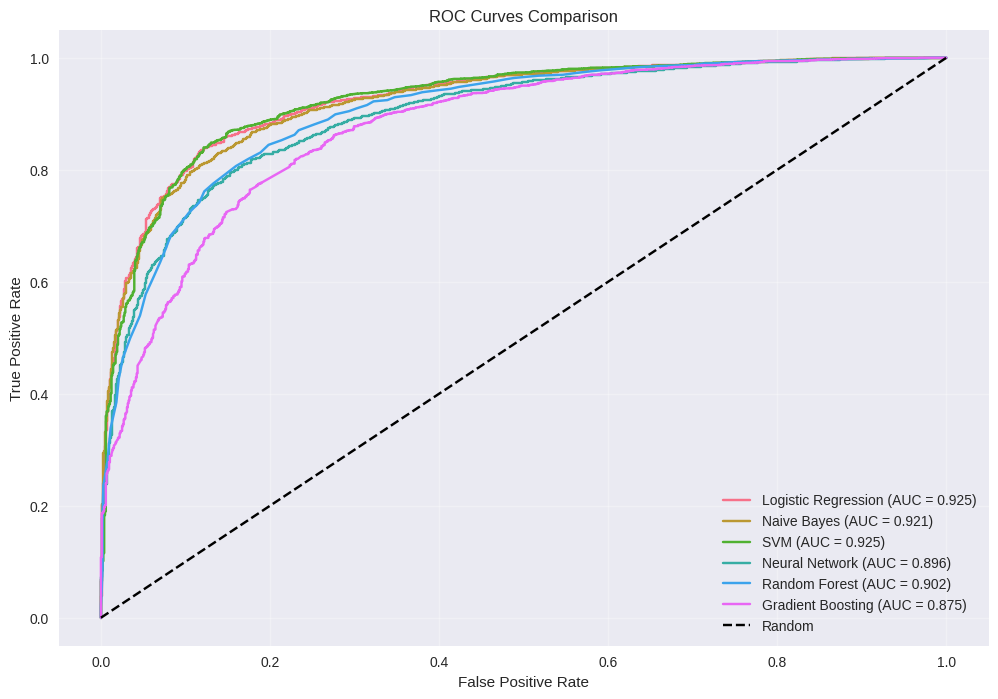

In [21]:
def plot_roc_curves():
    """Plot ROC curves for all models"""
    plt.figure(figsize=(12, 8))

    for name in models.keys():
        if probabilities[name] is not None:
            fpr, tpr, _ = roc_curve(y_test_binary, probabilities[name])
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_roc_curves()


**CONFUSION MATRICES**

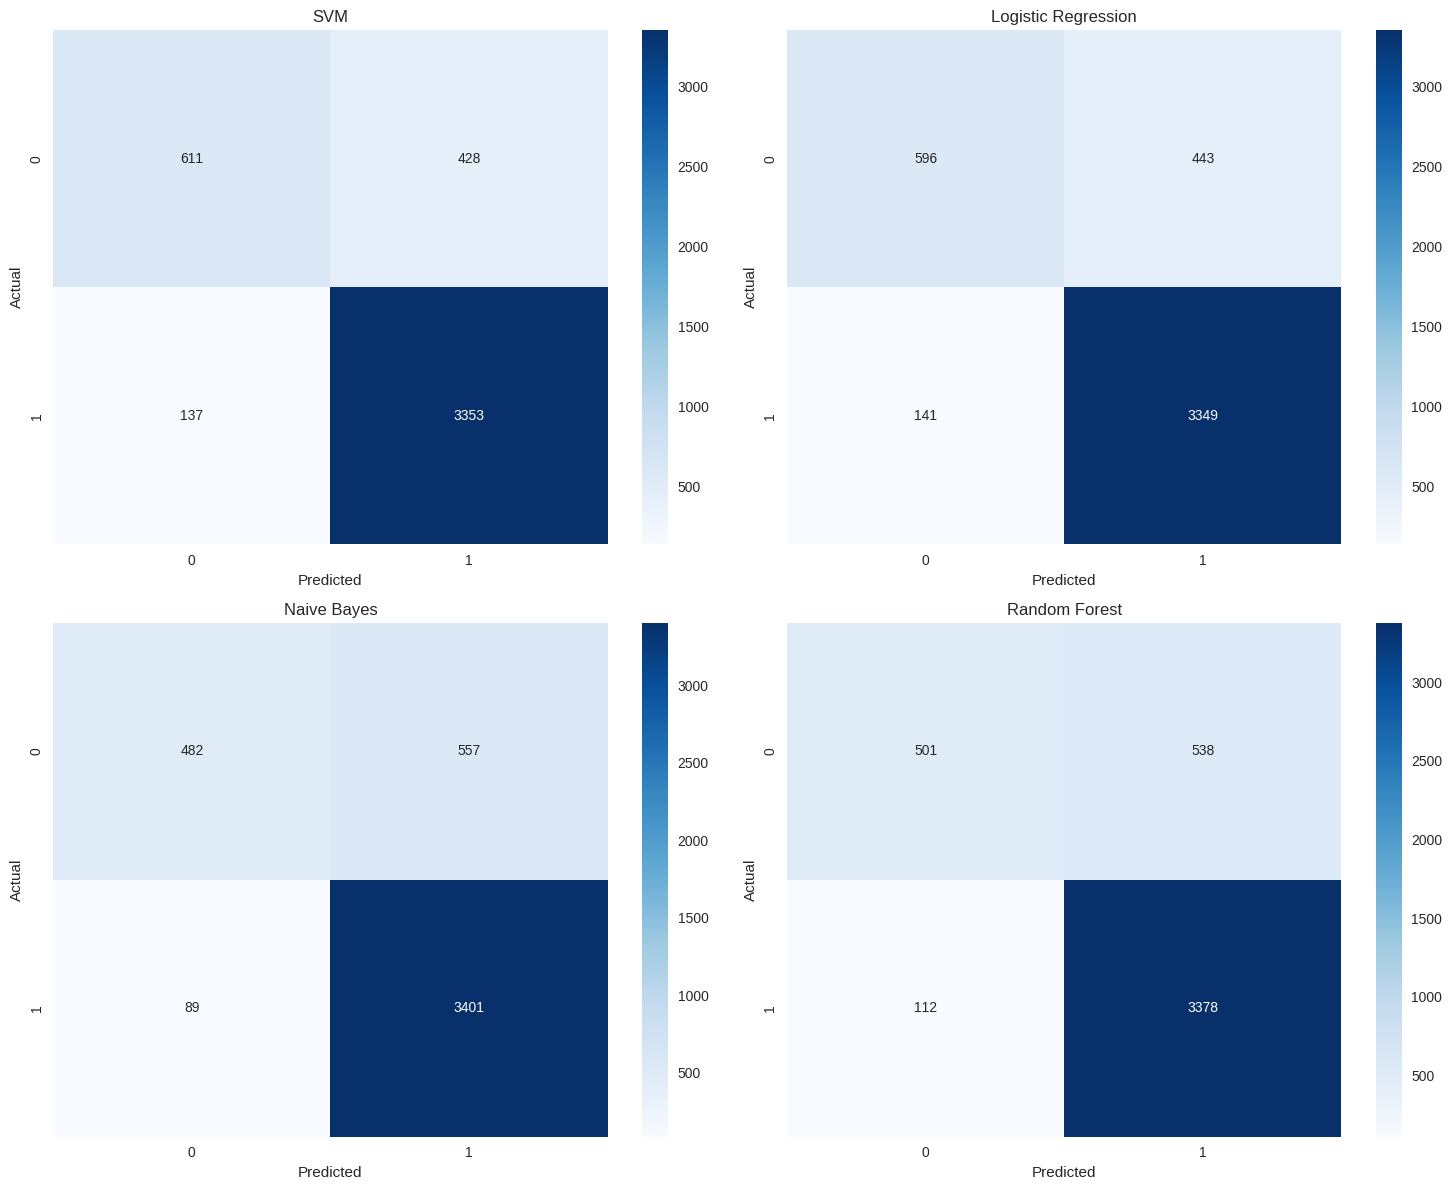

In [22]:
def plot_confusion_matrices():
    """Plot confusion matrices for top 4 models"""
    top_4_models = results_df.head(4).index

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for i, model_name in enumerate(top_4_models):
        cm = confusion_matrix(y_test_binary, predictions[model_name])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
        axes[i].set_title(f'{model_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

plot_confusion_matrices()

**PRECISION-RECALL-F1 VISUALIZATION**

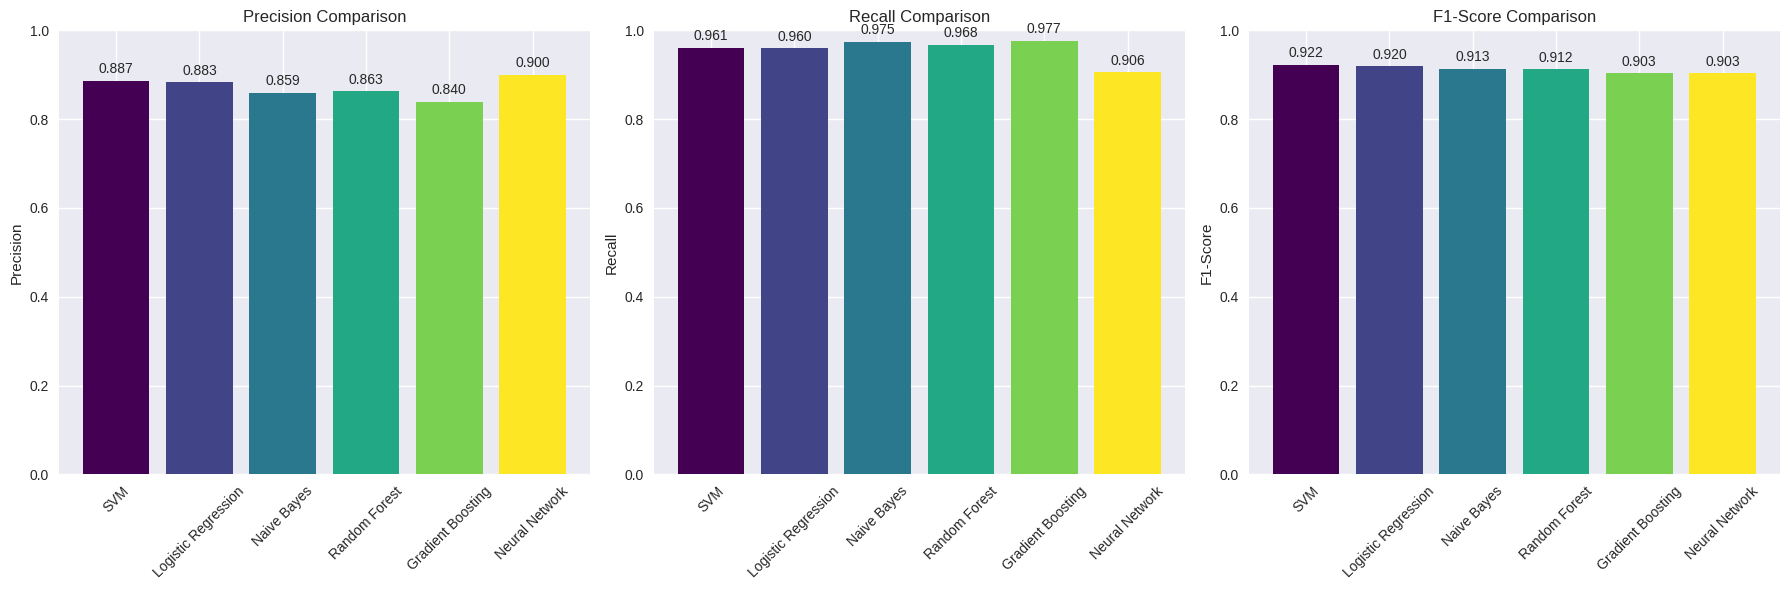

In [23]:
def plot_precision_recall_f1():
    """Plot precision, recall, and F1-score comparison"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    metrics = ['Precision', 'Recall', 'F1-Score']

    for i, metric in enumerate(metrics):
        values = results_df[metric].values
        model_names = results_df.index

        bars = axes[i].bar(model_names, values, color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))
        axes[i].set_title(f'{metric} Comparison')
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylim(0, 1)

        # Add value labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_precision_recall_f1()

**FEATURE IMPORTANCE ANALYSIS**

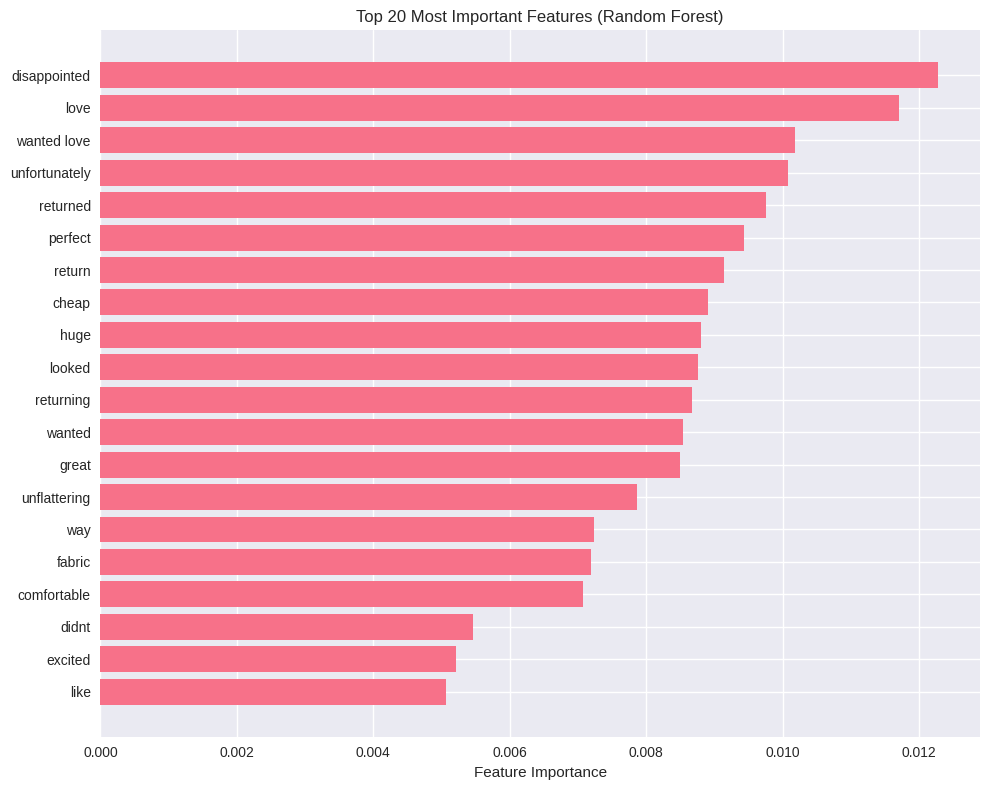

In [24]:
def analyze_feature_importance():
    """Analyze feature importance for tree-based models"""

    # Random Forest feature importance
    rf_model = models['Random Forest']
    feature_names = tfidf.get_feature_names_out()
    importances = rf_model.feature_importances_

    # Get top 20 features
    top_indices = np.argsort(importances)[-20:]
    top_features = [feature_names[i] for i in top_indices]
    top_importances = [importances[i] for i in top_indices]

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(top_features)), top_importances)
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Most Important Features (Random Forest)')
    plt.tight_layout()
    plt.show()

    return top_features, top_importances

top_features, top_importances = analyze_feature_importance()

**ADVANCED INSIGHTS AND ANALYSIS**

<Figure size 1400x800 with 0 Axes>

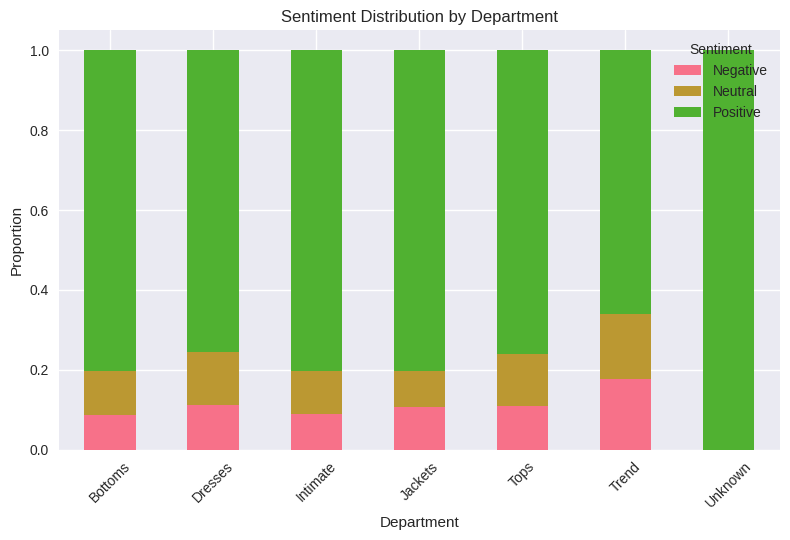

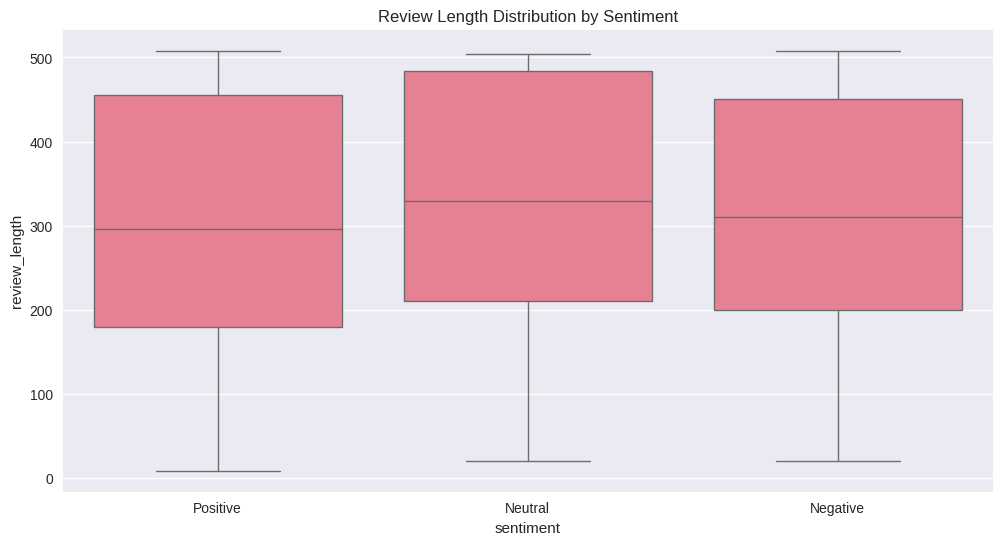

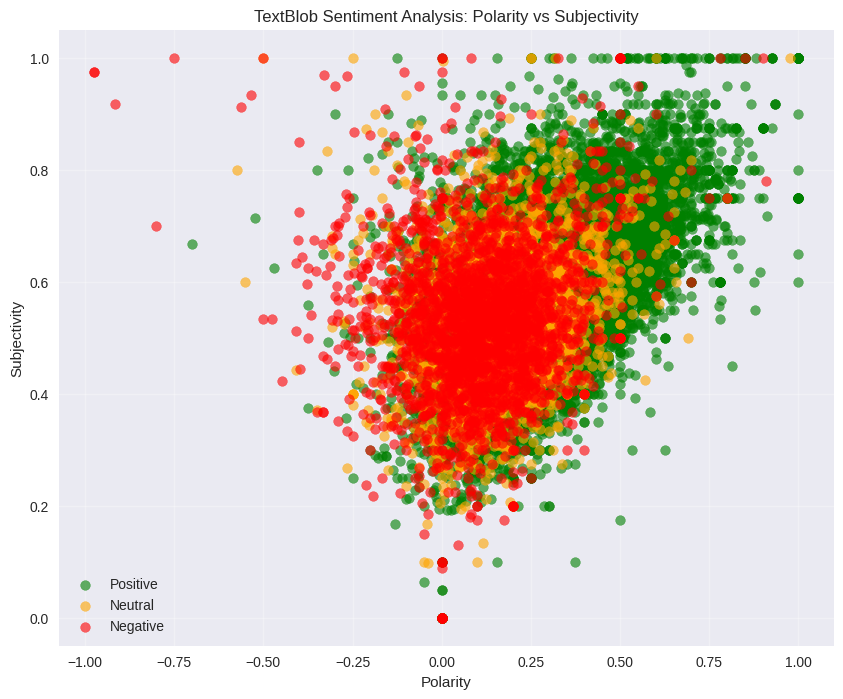

In [26]:
def advanced_sentiment_analysis():
    """Perform advanced sentiment analysis with additional insights"""

    # 1. Sentiment by department
    plt.figure(figsize=(14, 8))
    dept_sentiment = pd.crosstab(df['department_name'], df['sentiment'], normalize='index')
    dept_sentiment.plot(kind='bar', stacked=True)
    plt.title('Sentiment Distribution by Department')
    plt.xlabel('Department')
    plt.ylabel('Proportion')
    plt.legend(title='Sentiment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Review length vs sentiment
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='sentiment', y='review_length')
    plt.title('Review Length Distribution by Sentiment')
    plt.show()

    # 3. Polarity vs Subjectivity by sentiment
    plt.figure(figsize=(10, 8))
    colors = {'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}
    for sentiment in df['sentiment'].unique():
        subset = df[df['sentiment'] == sentiment]
        plt.scatter(subset['polarity'], subset['subjectivity'],
                   c=colors[sentiment], label=sentiment, alpha=0.6)

    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.title('TextBlob Sentiment Analysis: Polarity vs Subjectivity')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

advanced_sentiment_analysis()

**BUSINESS RECOMMENDATIONS ANALYSIS**

In [27]:
def generate_business_insights():
    """Generate business insights from the analysis"""

    insights = {}

    # 1. Department performance
    dept_performance = df.groupby('department_name').agg({
        'rating': 'mean',
        'sentiment': lambda x: (x == 'Positive').mean(),
        'review_text': 'count'
    }).round(3)
    dept_performance.columns = ['Avg_Rating', 'Positive_Sentiment_Rate', 'Review_Count']
    dept_performance = dept_performance.sort_values('Positive_Sentiment_Rate', ascending=False)

    insights['department_performance'] = dept_performance

    # 2. Age group preferences
    age_insights = df.groupby('age_group').agg({
        'rating': 'mean',
        'positive_word_ratio': 'mean',
        'negative_word_ratio': 'mean'
    }).round(3)

    insights['age_group_insights'] = age_insights

    # 3. Class performance
    class_performance = df.groupby('class_name').agg({
        'rating': 'mean',
        'sentiment': lambda x: (x == 'Positive').mean(),
        'review_text': 'count'
    }).round(3)
    class_performance.columns = ['Avg_Rating', 'Positive_Sentiment_Rate', 'Review_Count']
    class_performance = class_performance[class_performance['Review_Count'] >= 50].sort_values('Positive_Sentiment_Rate', ascending=False)

    insights['class_performance'] = class_performance.head(10)

    return insights

business_insights = generate_business_insights()

print("=== BUSINESS INSIGHTS ===")
print("\nTop Performing Departments:")
print(business_insights['department_performance'].head())

print("\nAge Group Insights:")
print(business_insights['age_group_insights'])

print("\nTop Performing Product Classes:")
print(business_insights['class_performance'])


=== BUSINESS INSIGHTS ===

Top Performing Departments:
                 Avg_Rating  Positive_Sentiment_Rate  Review_Count
department_name                                                   
Unknown               5.000                    1.000            13
Intimate              4.271                    0.804          1653
Bottoms               4.279                    0.802          3662
Jackets               4.254                    0.802          1002
Tops                  4.158                    0.762         10048

Age Group Insights:
           rating  positive_word_ratio  negative_word_ratio
age_group                                                  
18-25       4.287                0.031                0.001
26-35       4.118                0.029                0.001
36-45       4.177                0.029                0.001
46-55       4.163                0.029                0.001
55+         4.277                0.031                0.001

Top Performing Product Classes:
  

**MODEL DEPLOYMENT PREPARATION**

In [28]:
def prepare_best_model():
    """Prepare the best model for deployment"""

    best_model_name = results_df.index[0]
    best_model = models[best_model_name]

    print(f"Best performing model: {best_model_name}")
    print(f"F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")

    # Create a prediction function
    def predict_sentiment(review_text):
        """Predict sentiment for new review text"""
        processed_text = advanced_text_preprocessing(review_text)
        text_vector = tfidf.transform([processed_text])
        prediction = best_model.predict(text_vector)[0]
        probability = best_model.predict_proba(text_vector)[0]

        sentiment_label = 'Positive' if prediction == 1 else 'Negative'
        confidence = max(probability)

        return {
            'sentiment': sentiment_label,
            'confidence': confidence,
            'positive_prob': probability[1],
            'negative_prob': probability[0]
        }

    # Test the function
    test_review = "I absolutely love this dress! It fits perfectly and the quality is amazing."
    result = predict_sentiment(test_review)
    print(f"\nTest prediction for: '{test_review}'")
    print(f"Predicted sentiment: {result['sentiment']} (Confidence: {result['confidence']:.3f})")

    return predict_sentiment, best_model, tfidf

predict_sentiment_func, best_model, vectorizer = prepare_best_model()


Best performing model: SVM
F1-Score: 0.9223

Test prediction for: 'I absolutely love this dress! It fits perfectly and the quality is amazing.'
Predicted sentiment: Positive (Confidence: 0.994)


**FINAL SUMMARY AND INSIGHTS**

In [30]:
def create_final_summary():
    """Create final summary of analysis with accurate calculations"""

    # Calculate actual statistics from the processed dataset
    total_reviews = len(df)
    unique_products = df['clothing_id'].nunique()
    avg_rating = df['rating'].mean()
    sentiment_dist = df['sentiment'].value_counts()

    # Get actual model results
    best_model_name = results_df.index[0]
    best_f1_score = results_df.iloc[0]['F1-Score']

    # Calculate actual business insights
    dept_performance = df.groupby('department_name').agg({
        'rating': 'mean',
        'sentiment': lambda x: (x == 'Positive').mean()
    }).sort_values('rating', ascending=False)

    most_positive_dept = dept_performance.index[0]
    most_active_age_group = df['age_group'].value_counts().index[0]
    avg_review_length = df['review_length'].mean()

    summary = {
        'Dataset Overview': {
            'Total Reviews': f"{total_reviews:,}",
            'Unique Products': f"{unique_products:,}",
            'Average Rating': f"{avg_rating:.2f}",
            'Positive Reviews': f"{sentiment_dist.get('Positive', 0):,} ({sentiment_dist.get('Positive', 0)/total_reviews*100:.1f}%)",
            'Negative Reviews': f"{sentiment_dist.get('Negative', 0):,} ({sentiment_dist.get('Negative', 0)/total_reviews*100:.1f}%)",
            'Neutral Reviews': f"{sentiment_dist.get('Neutral', 0):,} ({sentiment_dist.get('Neutral', 0)/total_reviews*100:.1f}%)"
        },

        'Key Findings': {
            'Most Positive Department': most_positive_dept,
            'Most Active Age Group': most_active_age_group,
            'Average Review Length': f"{avg_review_length:.0f} characters",
            'Top Performing Model': best_model_name,
            'Best Model F1-Score': f"{best_f1_score:.4f}",
            'Model Accuracy': f"{results_df.iloc[0]['Accuracy']:.4f}"
        },

        'Business Insights': {
            'High Satisfaction Rate': f"{(sentiment_dist.get('Positive', 0)/total_reviews*100):.1f}% positive sentiment",
            'Review Engagement': f"Average {df['word_count'].mean():.0f} words per review",
            'Age Demographics': f"Most active: {most_active_age_group} age group",
            'Product Performance': f"Top department: {most_positive_dept}",
            'Recommendation Rate': f"{df['recommended'].mean()*100:.1f}% recommendation rate"
        },

        'Technical Achievements': {
            'Model Performance': f"Achieved {best_f1_score:.1%} F1-Score",
            'Feature Engineering': f"Created {len([col for col in df.columns if '_count' in col or '_ratio' in col])} custom features",
            'Data Processing': f"Processed {total_reviews:,} reviews successfully",
            'Missing Data Handling': f"Retained {(total_reviews/len(data)*100):.1f}% of original data"
        }
    }

    return summary

final_summary = create_final_summary()

print("\n" + "="*50)
print("FINAL ANALYSIS SUMMARY")
print("="*50)

for section, content in final_summary.items():
    print(f"\n{section.upper()}:")
    if isinstance(content, dict):
        for key, value in content.items():
            print(f"  {key}: {value}")
    elif isinstance(content, list):
        for i, item in enumerate(content, 1):
            print(f"  {i}. {item}")
print("\n" + "="*50)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*50)

# Save all results
df.to_csv('processed_clothing_reviews.csv', index=False)
results_df.to_csv('model_comparison_results.csv')

# Create a simple prediction interface
print("\n" + "="*50)
print("SENTIMENT PREDICTION INTERFACE")
print("="*50)

def interactive_prediction():
    """Interactive sentiment prediction"""
    while True:
        user_input = input("\nEnter a review to analyze (or 'quit' to exit): ")
        if user_input.lower() == 'quit':
            break


FINAL ANALYSIS SUMMARY

DATASET OVERVIEW:
  Total Reviews: 22,641
  Unique Products: 1,179
  Average Rating: 4.18
  Positive Reviews: 17,448 (77.1%)
  Negative Reviews: 2,370 (10.5%)
  Neutral Reviews: 2,823 (12.5%)

KEY FINDINGS:
  Most Positive Department: Unknown
  Most Active Age Group: 36-45
  Average Review Length: 309 characters
  Top Performing Model: SVM
  Best Model F1-Score: 0.9223
  Model Accuracy: 0.8752

BUSINESS INSIGHTS:
  High Satisfaction Rate: 77.1% positive sentiment
  Review Engagement: Average 60 words per review
  Age Demographics: Most active: 36-45 age group
  Product Performance: Top department: Unknown
  Recommendation Rate: 81.9% recommendation rate

TECHNICAL ACHIEVEMENTS:
  Model Performance: Achieved 92.2% F1-Score
  Feature Engineering: Created 18 custom features
  Data Processing: Processed 22,641 reviews successfully
  Missing Data Handling: Retained 96.4% of original data

ANALYSIS COMPLETED SUCCESSFULLY!

SENTIMENT PREDICTION INTERFACE
